## ROF 模型去噪

In [1]:
import numpy as np

In [37]:
def denoise(im, U_init, tolerance=0.1, tau=0.125, tv_weight=100):
    """
    使用A. Chambolle（2005）在公式（11）中的计算步骤实现 Rudin-Osher-Fatemi（ROF ）去噪模型

    输入：含有噪声的输入图像（灰度图像）、 U 的初始值、 TV 正则项权值、步长、停业条件

    输出：去噪和去除纹理后的图像、纹理残留

    """
    m, n = im.shape  # 噪声图像的大小

    # 初始化
    U = U_init
    Px = im  # 对偶域的 x 分量
    Py = im  # 对偶域的 y 分量
    error = 1

    while error > tolerance:
        Uold = U
        # 原始变量的梯度
        GradUx = np.roll(U, -1, axis=1) - U  # 变量 U 梯度的 X 分量
        GradUy = np.roll(U, -1, axis=0) - U  # 变量 U 梯度的 y 分量

        # 更新对偶变量
        PxNew = Px + (tau/tv_weight) * GradUx
        PyNew = Py + (tau/tv_weight) * GradUy
        NormNew = np.maximum(1, np.sqrt(PxNew**2 + PyNew**2))

        Px = PxNew / NormNew  # 更新 x 分量（对偶）
        Py = PyNew / NormNew  # 更新 y 分量（对偶）

        # 更新原始变量
        RxPx = np.roll(Px, 1, axis=1)  # 对 x 分量进行向右 x 轴平移
        RyPy = np.roll(Py, 1, axis=0)  # 对 y 分量进行向右（下） y 轴平移

        Divp = (Px - RxPx) + (Py - RyPy)  # 对偶域的散度
        U = im + tv_weight * Divp  # 更新原始变量

        # 更新误差
        error = np.linalg.norm(U - Uold) / np.sqrt(n*m)
    
    return U, im-U # 图像去噪和纹理残余

## 合成的噪声图像示例

In [32]:
from scipy.ndimage import filters
import matplotlib.pyplot as plt
from scipy.misc import imsave

In [44]:
# 使用噪声创建合成图像
im_org = np.zeros((500, 500))

In [45]:
im_org[100:400, 100:400] = 128
im_org[200:300, 200:300] = 255

### 原始图像

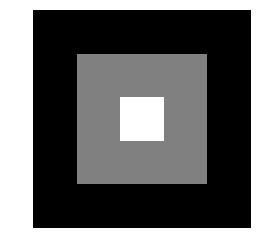

In [46]:
plt.imshow(im_org)
plt.axis('off')
plt.show()

### 噪声图像

In [47]:
im = im_org + 30 * np.random.standard_normal((500, 500))

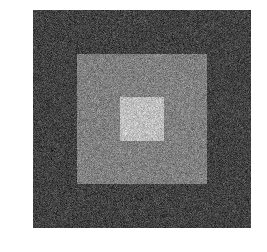

In [48]:
plt.imshow(im)
plt.axis('off')
plt.show()

### ROF 去噪

In [49]:
U, T = denoise(im, im)

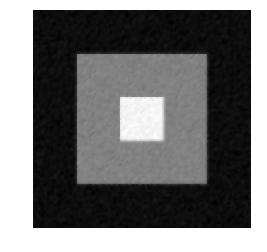

In [50]:
plt.imshow(U)
plt.axis('off')
plt.show()

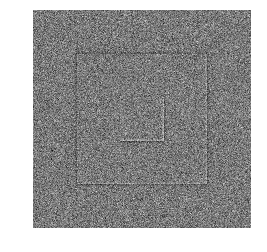

In [51]:
plt.imshow(T)
plt.axis('off')
plt.show()

### 高斯模糊

In [52]:
G = filters.gaussian_filter(im_org, sigma=10)

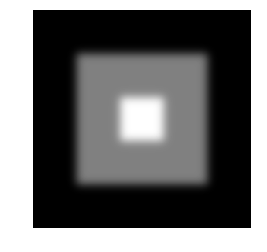

In [53]:
plt.imshow(G)
plt.axis('off')
plt.show()

## 实际图像中使用 ROF 模型去噪

In [77]:
from PIL import Image

In [78]:
im_org = np.array(Image.open('../../data/empire.jpg').convert('L'))

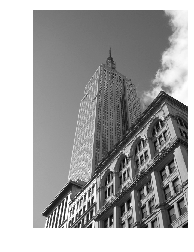

In [80]:
plt.imshow(im_org)
plt.axis('off')
plt.show()

In [83]:
im_gau = filters.gaussian_filter(im_org, sigma=5)

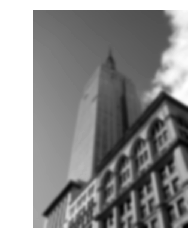

In [84]:
plt.imshow(im_gau)
plt.axis('off')
plt.show()

In [87]:
U, T = denoise(im_org, im_org)

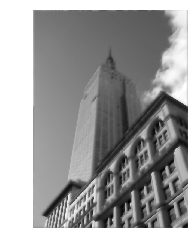

In [88]:
plt.imshow(U)
plt.axis('off')
plt.show()